# Impacts of IBAPs on cognitive outcome variability
Finally, we will study the impact of the main axis of variation of IBAPs (PC1) on cognitive outcome variability. 
For this, different cognitive outcomes will be used depending on the available data.
1. For dHCP
2. For ABCD
3. For BLS

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plot settings
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rc_file('code/matplotlibrc')

from statsmodels.formula.api import ols
from scipy.stats import spearmanr

# import custom functions
import sys
sys.path.append('code')
from plotting import correlation_plot, plot_pc_loadings
from analysis_helpers import get_roi_names
from stats import conduct_pca


# directories
centile_dir = join('outputs', 'spatial_heterogeneity')
outputs_dir_main = join('outputs', 'cognition')
os.makedirs(outputs_dir_main, exist_ok=True)

color_pt = 'darkorange'

In [3]:
# load all necessary data, i.e., deviation scores computed in script 1
try:
    # dHCP
    dhcp_ct = pd.read_csv(join(centile_dir, 'dHCP/IBAP_CT/dHCP_CT_centiles_per_subject.csv'), index_col=0)
    dhcp_sa = pd.read_csv(join(centile_dir, 'dHCP/IBAP_SA/dHCP_SA_centiles_per_subject.csv'), index_col=0)
    
    # ABCD-10
    
    # BLS-26
    bls_26_ct = pd.read_csv(join(centile_dir, 'BLS-26/IBAP_CT/BLS-26_CT_centiles_per_subject.csv'), index_col=0)
    bls_26_sa = pd.read_csv(join(centile_dir, 'BLS-26/IBAP_SA/BLS-26_SA_centiles_per_subject.csv'), index_col=0)
except FileNotFoundError:
    print('Run script 1 for all required modalities and datasets first: dHCP CT, dHCP SA, BLS-26 CT, BLS-26 SA')
    sys.exit()

# 1. dHCP

In [4]:
out_dir = join(outputs_dir_main, 'dHCP')
os.makedirs(out_dir, exist_ok=True)

In [5]:
pc_ct, ct_loadings = conduct_pca(dhcp_ct, brain_measure='CT')
pc_sa, sa_loadings = conduct_pca(dhcp_sa, brain_measure='SA')

# add PC1 of SA and CT column
dhcp_ct['PC1_CT'] = pc_ct[:, 0]
dhcp_sa['PC1_SA'] = pc_sa[:, 0]

# save PC loadings
ct_loadings.to_csv(join(out_dir, 'PCA_loadings_CT_dHCP.csv'))
sa_loadings.to_csv(join(out_dir, 'PCA_loadings_SA_dHCP.csv'))

Conducting PCA on CT deviation scores...
Explained variance per principal component: 69.40%, 3.57% and 2.87%
Conducting PCA on SA deviation scores...
Explained variance per principal component: 66.30%, 4.42% and 3.36%


/Users/melissa/Dokumente/PhD/01B_preterm_normative/scripts/preterm-brain-heterogeneity/code/plotting.py:315: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, rotation=90, fontsize=10)
/Users/melissa/Dokumente/PhD/01B_preterm_normative/scripts/preterm-brain-heterogeneity/code/plotting.py:317: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)


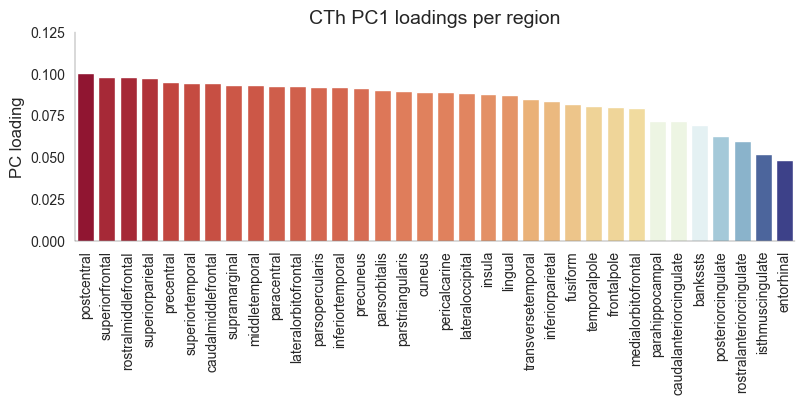

In [8]:
# CTh
loadings_ordered = pd.DataFrame(ct_loadings.sort_values(ascending=False))
loadings_ordered['order'] = np.arange(1,35,1)
loadings_ordered.index.name = 'ROI'
loadings_ordered.reset_index(inplace=True)

plot_pc_loadings(loadings_ordered, out_dir, brain_measure_name='CTh')

/Users/melissa/Dokumente/PhD/01B_preterm_normative/scripts/preterm-brain-heterogeneity/code/plotting.py:315: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, rotation=90, fontsize=10)
/Users/melissa/Dokumente/PhD/01B_preterm_normative/scripts/preterm-brain-heterogeneity/code/plotting.py:317: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)


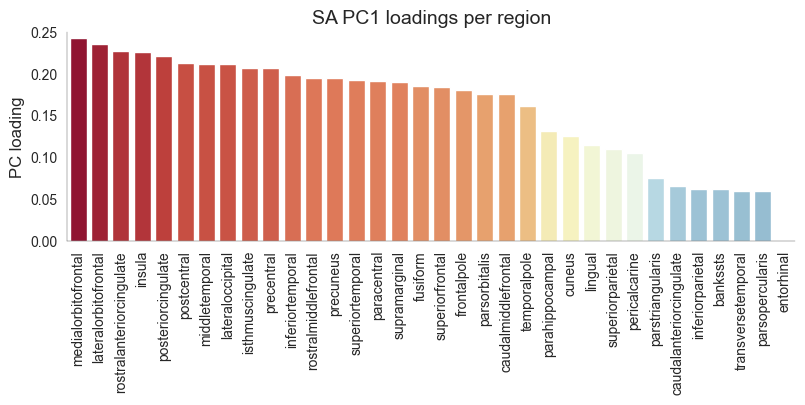

In [9]:
# SA
loadings_ordered = pd.DataFrame(sa_loadings.sort_values(ascending=False))
loadings_ordered.loc['centile_SA_entorhinal', 'PC1_loadings'] = 0  # set entorhinal to 0
loadings_ordered['order'] = np.arange(1,35,1)
loadings_ordered.index.name = 'ROI'
loadings_ordered.reset_index(inplace=True)

plot_pc_loadings(loadings_ordered, out_dir, brain_measure_name='SA')

In [ ]:
# cognition
x = 'SES_at_birth'
y = 'PC1_CT'
outname = join(out_dir, f'BLS-26_CT_preterm_correlation_{x}_{y}.svg')

# filter for preterms
bls_26_ct_pt = bls_26_ct[bls_26_ct['dx'] == 'preterm']

correlation_plot(x, y, data=bls_26_ct_pt, color=color_pt, 
                xlabel='Socio-economic status [a.u.]', ylabel='CTh PC1 [a.u.]', outname=outname)